# Data Description

Exame Nacional do Ensino Medio (ENEM) stands for National High School Exam in english. It is a non-mandatory, standarized Brazilian national exam, which evaluates high school students in Brazil. The ENEM is the most important exam in this kind in Brazil, whith more than 8.6 million registered candidates in 2016. It is the second largest in the world after the National Higher Education Entrance Examination, the entrance examination of higher education in China (taken from Wikipedia).

Every year the governement releases what they call as `microdata` which can be describe as the most granular (and anonymized) data about each student who took the exam.

In [111]:
import dask.dataframe as dd
import gc
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import operator
import seaborn as sns

In [2]:
microdata = "data/DADOS/MICRODADOS_ENEM_2017.csv"
data_dict  = "data/DICIONÁRIO/Dicionário_Microdados_Enem_2017.xlsx"

In [3]:
df = dd.read_csv(microdata, sep=';',encoding='latin-1', assume_missing=True)

In [4]:
df.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,1.700033e+11,2017.0,3503208.0,Araraquara,35.0,SP,29.0,F,0.0,1.0,...,A,C,B,B,C,B,B,B,A,A
1,1.700033e+11,2017.0,5002902.0,Cassilândia,50.0,MS,22.0,F,0.0,1.0,...,A,B,A,A,C,B,A,A,A,A
2,1.700017e+11,2017.0,3550308.0,São Paulo,35.0,SP,38.0,F,0.0,1.0,...,A,B,A,A,C,A,B,B,A,A
3,1.700017e+11,2017.0,4209300.0,Lages,42.0,SC,35.0,F,0.0,1.0,...,B,C,A,B,D,A,B,B,A,A
4,1.700017e+11,2017.0,2704302.0,Maceió,27.0,AL,40.0,M,0.0,3.0,...,A,B,B,A,C,A,C,B,A,A
5,1.700017e+11,2017.0,4303103.0,Cachoeirinha,43.0,RS,20.0,F,0.0,1.0,...,B,D,B,A,D,A,C,B,A,A
6,1.700033e+11,2017.0,4106902.0,Curitiba,41.0,PR,36.0,M,1.0,2.0,...,B,B,A,A,C,A,B,B,A,A
7,1.700033e+11,2017.0,4214805.0,Rio do Sul,42.0,SC,18.0,F,0.0,1.0,...,B,B,A,B,D,B,B,B,A,A
8,1.700033e+11,2017.0,4322509.0,Vacaria,43.0,RS,23.0,F,0.0,1.0,...,A,B,A,A,B,A,A,A,A,A
9,1.700017e+11,2017.0,2607901.0,Jaboatão dos Guararapes,26.0,PE,23.0,M,0.0,3.0,...,A,B,B,A,D,B,B,B,A,A


In [15]:
%%time
len(df)

CPU times: user 3min 52s, sys: 2min 9s, total: 6min 2s
Wall time: 2min 18s


6731341

Cada 10% = ~600 mil dados

The data can be divided into nine categories:
 - Student Data
 - Student's school Data
 - Special Treatment Data
 - Specific Treatment Data
 - Special and Specific Requests for the Test Data
 - Place where the Test were taken Data
 - Test Data
 - Essay Data
 - Social Economic Data
 
 Those informations are datailed by the following tables*:
 
 *
_I needed to use an image since `pandas` has some serious issues to treat Multi-Index Excel Files. You can check the original photo inside `img` folder._

## Student Information Data


![student](img/student_info.png)

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 4s, sys: 1min 57s, total: 6min 1s
Wall time: 2min 24s


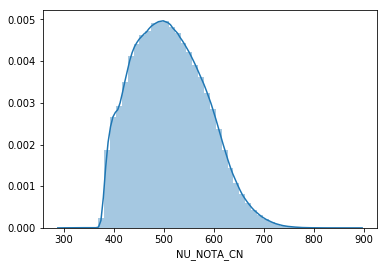

In [31]:
%%time
sns.distplot(df[('NU_NOTA_CN')].fillna(0)[df[('NU_NOTA_CN')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 7s, sys: 1min 49s, total: 5min 57s
Wall time: 2min 24s


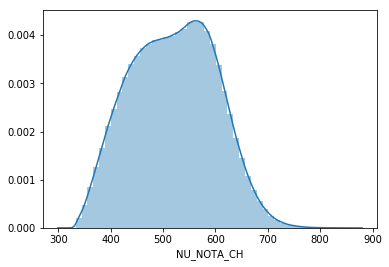

In [32]:
%%time
sns.distplot(df[('NU_NOTA_CH')].fillna(0)[df[('NU_NOTA_CH')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 2s, sys: 1min 48s, total: 5min 51s
Wall time: 2min 21s


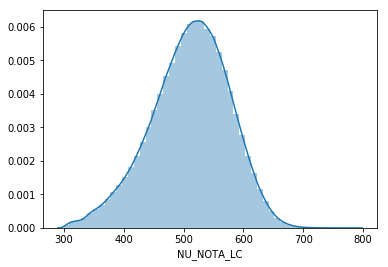

In [33]:
%%time
sns.distplot(df[('NU_NOTA_LC')].fillna(0)[df[('NU_NOTA_LC')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 2s, sys: 1min 57s, total: 5min 59s
Wall time: 2min 24s


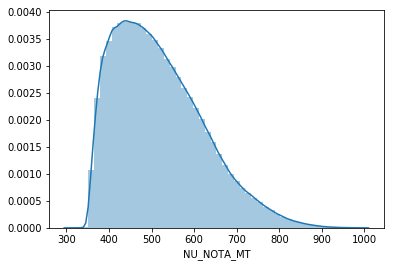

In [34]:
%%time
sns.distplot(df[('NU_NOTA_MT')].fillna(0)[df[('NU_NOTA_MT')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 16s, sys: 1min 59s, total: 6min 15s
Wall time: 2min 33s


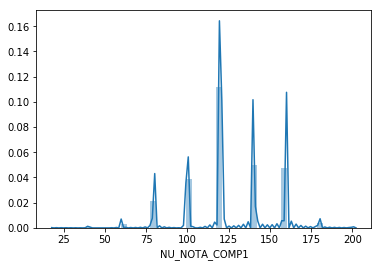

In [35]:
%%time
sns.distplot(df[('NU_NOTA_COMP1')].fillna(0)[df[('NU_NOTA_COMP1')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 11s, sys: 2min 7s, total: 6min 18s
Wall time: 2min 28s


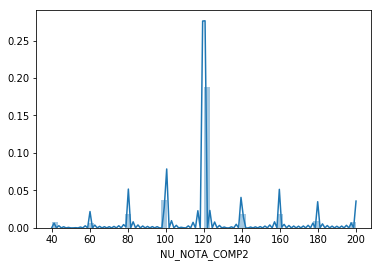

In [36]:
%%time
sns.distplot(df[('NU_NOTA_COMP2')].fillna(0)[df[('NU_NOTA_COMP2')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 14s, sys: 2min 5s, total: 6min 20s
Wall time: 2min 35s


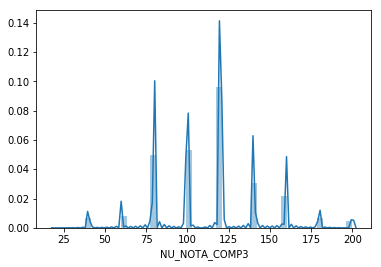

In [37]:
%%time
sns.distplot(df[('NU_NOTA_COMP3')].fillna(0)[df[('NU_NOTA_COMP3')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 4s, sys: 2min 6s, total: 6min 11s
Wall time: 2min 23s


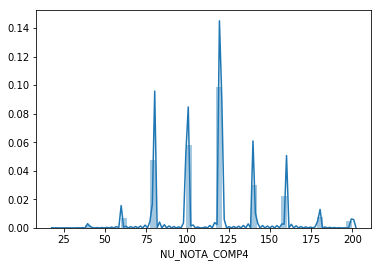

In [38]:
%%time
sns.distplot(df[('NU_NOTA_COMP4')].fillna(0)[df[('NU_NOTA_COMP4')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 18s, sys: 1min 59s, total: 6min 17s
Wall time: 2min 37s


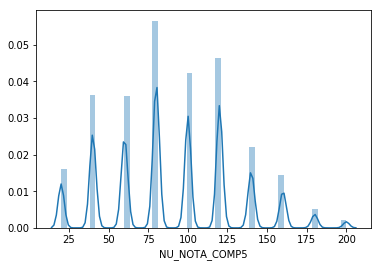

In [39]:
%%time
sns.distplot(df[('NU_NOTA_COMP5')].fillna(0)[df[('NU_NOTA_COMP5')].fillna(0)>0])

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 3min 57s, sys: 1min 51s, total: 5min 49s
Wall time: 2min 16s


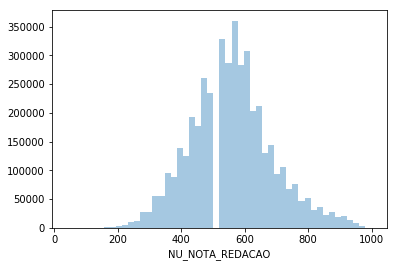

In [51]:
%%time
sns.distplot(df[('NU_NOTA_REDACAO')].fillna(0)[df[('NU_NOTA_REDACAO')].fillna(0)>0], kde=False)

In [41]:
sample = df.sample(frac=0.1)

In [42]:
%%time
pandas_df = sample.compute()

CPU times: user 4min 19s, sys: 3min 3s, total: 7min 23s
Wall time: 2min 48s


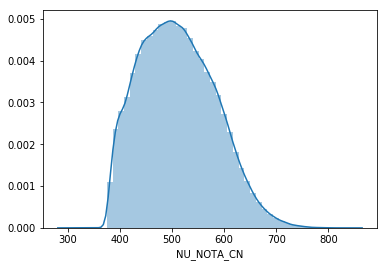

In [52]:
sns.distplot(pandas_df[('NU_NOTA_CN')].fillna(0)[pandas_df[('NU_NOTA_CN')].fillna(0)>0])

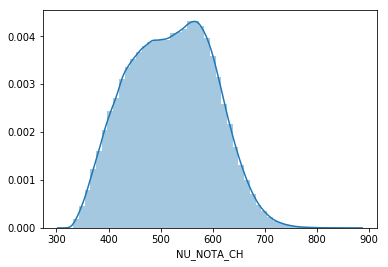

In [53]:
sns.distplot(pandas_df[('NU_NOTA_CH')].fillna(0)[pandas_df[('NU_NOTA_CH')].fillna(0)>0])

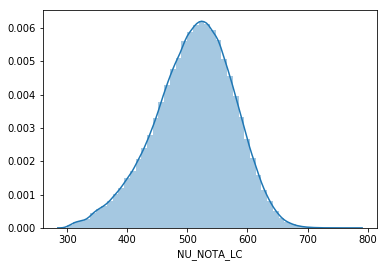

In [54]:
sns.distplot(pandas_df[('NU_NOTA_LC')].fillna(0)[pandas_df[('NU_NOTA_LC')].fillna(0)>0])

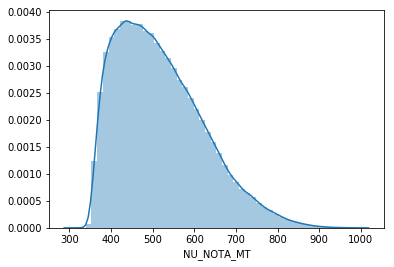

In [55]:
sns.distplot(pandas_df[('NU_NOTA_MT')].fillna(0)[pandas_df[('NU_NOTA_MT')].fillna(0)>0])

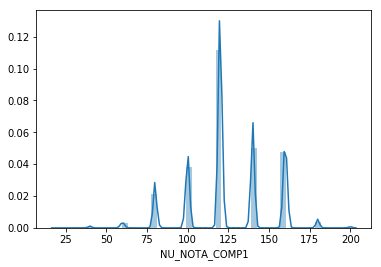

In [56]:
sns.distplot(pandas_df[('NU_NOTA_COMP1')].fillna(0)[pandas_df[('NU_NOTA_COMP1')].fillna(0)>0])

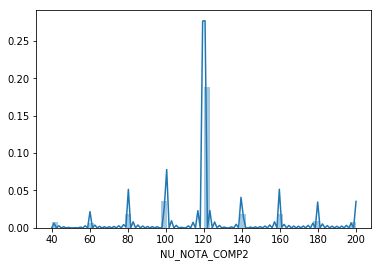

In [57]:
sns.distplot(pandas_df[('NU_NOTA_COMP2')].fillna(0)[pandas_df[('NU_NOTA_COMP2')].fillna(0)>0])

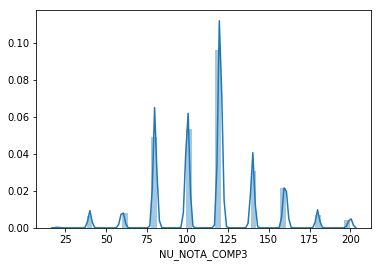

In [58]:
sns.distplot(pandas_df[('NU_NOTA_COMP3')].fillna(0)[pandas_df[('NU_NOTA_COMP3')].fillna(0)>0])

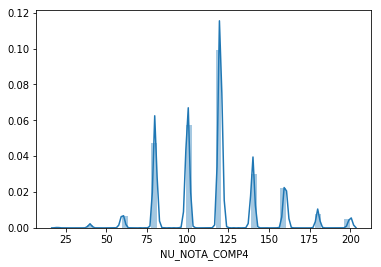

In [59]:
sns.distplot(pandas_df[('NU_NOTA_COMP4')].fillna(0)[pandas_df[('NU_NOTA_COMP4')].fillna(0)>0])

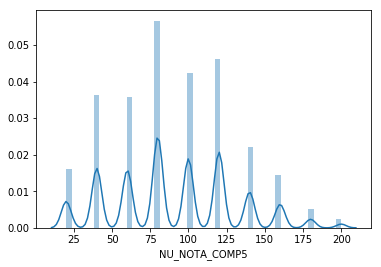

In [60]:
sns.distplot(pandas_df[('NU_NOTA_COMP5')].fillna(0)[pandas_df[('NU_NOTA_COMP5')].fillna(0)>0])

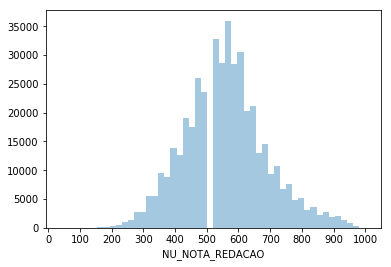

In [70]:
import matplotlib.ticker as ticker
x = np.random.randint(0,1000, size=(100))
ax = sns.distplot(pandas_df[('NU_NOTA_REDACAO')].fillna(0)[pandas_df[('NU_NOTA_REDACAO')].fillna(0)>0], kde=False);
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

In [86]:
pd.set_option('display.max_columns',None)

In [87]:
pandas_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
54063,1.700000e+11,2017.0,2401305.0,Augusto Severo,24.0,RN,18.0,M,0.0,3.0,1.0,2409308.0,Patu,24.0,RN,1.0,2.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2402303.0,Caraúbas,24.0,RN,1.0,1.0,1.0,1.0,394.0,397.0,402.0,405.0,428.4,554.6,523.4,530.9,CABDDBEDDDAACDABDBAAEBDECBDBBEBAEDCDEBACDDDBA,EBDEBBDCECEBCBAAABECBAECCDECCBEDBBBADBEACDAEA,99999ECAECCECADECEACCDBDABBDEEBDDBBCBDDADEEDDBCCCD,CBDBEBADDBCBDADCBBBEBBCDACADBBCAEBDDCBCAEAADB,1.0,EEAAECDCCDADAADECDCBCDAAEDEEBABCEDDCBEBAABCBB,ECAEBCDDECADBEABDDBDBDAEBCCCCDEAEDAEBBEDABAEC,DDCDEEDBEECEBADEDEABEDBBBDBCCABAAAABCBDAEDEDDBCDAE,BBDBADBEECDCCECAEBBDDEDDCCBBACADAEACEADABDECB,1.0,160.0,140.0,120.0,100.0,100.0,620.0,A,C,A,A,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
74480,1.700033e+11,2017.0,2512903.0,Rio Tinto,25.0,PB,17.0,M,0.0,5.0,1.0,2512903.0,Rio Tinto,25.0,PB,2.0,0.0,2.0,1.0,0.0,25087878.0,2512903.0,Rio Tinto,25.0,PB,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2512903.0,Rio Tinto,25.0,PB,1.0,1.0,1.0,1.0,391.0,396.0,400.0,403.0,548.7,633.1,560.3,553.1,DDAECADCEBEABCCCAEDAEADAACBEAEDECABBDCBDDEBBC,CACBEACAECBDEBBABCEDBADCCABAAEABEBECAADBCDDEC,EDDCA99999BBEBDAEDAACAABDDBEEDBEDABABBEBDBCEDADBCE,CDDAADADADBCBBECEEABDCDCACBEEAEADBCEAEBABCDCE,0.0,DEEBDABCBBEDDCBABCADECEBAADAAECDCBCCDACDEEAAE,CDEAEECAEBDBDBBAECDAEBCCCDAEBEABDBEDAADBCDDEC,EDDCDBEEDECCEBDAEDAEDAABEDBBADEDEDDABAABBDCBEABBCC,ADBCCECBBDBAEBBDDDABDCCDEDECBEACDAEAABBACEECD,1.0,160.0,160.0,160.0,200.0,160.0,840.0,C,C,B,F,6.0,C,A,B,D,A,A,B,A,A,A,A,A,A,B,A,A,D,B,B,B,B,A
26659,1.700017e+11,2017.0,4316907.0,Santa Maria,43.0,RS,20.0,F,0.0,1.0,1.0,4316907.0,Santa Maria,43.0,RS,1.0,2.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [120]:
number_na = dict()
for i in tqdm(pandas_df.columns):
    num_nan_i = pandas_df.loc[ (pd.isna(pandas_df[i])), i ].shape[0]
    number_na[i]= num_nan_i


100%|██████████| 137/137 [00:01<00:00, 88.02it/s]

In [124]:
len(pandas_df)

673134

In [121]:
sorted(number_na.items(), key=operator.itemgetter(1), reverse=True)

[('TP_SIT_FUNC_ESC', 495410),
 ('TP_ENSINO', 494803),
 ('CO_ESCOLA', 494800),
 ('CO_MUNICIPIO_ESC', 494800),
 ('NO_MUNICIPIO_ESC', 494800),
 ('CO_UF_ESC', 494800),
 ('SG_UF_ESC', 494800),
 ('TP_DEPENDENCIA_ADM_ESC', 494800),
 ('TP_LOCALIZACAO_ESC', 494800),
 ('CO_PROVA_CN', 229844),
 ('CO_PROVA_MT', 229844),
 ('NU_NOTA_CN', 229844),
 ('NU_NOTA_MT', 229844),
 ('TX_RESPOSTAS_CN', 229844),
 ('TX_RESPOSTAS_MT', 229844),
 ('TX_GABARITO_CN', 229844),
 ('TX_GABARITO_MT', 229844),
 ('CO_PROVA_CH', 203444),
 ('CO_PROVA_LC', 203444),
 ('NU_NOTA_CH', 203444),
 ('NU_NOTA_LC', 203444),
 ('TX_RESPOSTAS_CH', 203444),
 ('TX_RESPOSTAS_LC', 203444),
 ('TX_GABARITO_CH', 203444),
 ('TX_GABARITO_LC', 203444),
 ('TP_STATUS_REDACAO', 203444),
 ('NU_NOTA_COMP1', 203444),
 ('NU_NOTA_COMP2', 203444),
 ('NU_NOTA_COMP3', 203444),
 ('NU_NOTA_COMP4', 203444),
 ('NU_NOTA_COMP5', 203444),
 ('NU_NOTA_REDACAO', 203444),
 ('TP_ESTADO_CIVIL', 27291),
 ('CO_MUNICIPIO_NASCIMENTO', 22849),
 ('NO_MUNICIPIO_NASCIMENTO', 22849

# Next steps

- Remove all the rows with None as Grades
- Remove Gabarito From Columns
- Remove Presenca
- NU_INSCRICAO
- NU_ANO
- E RESIDENCIAS
- Remove Notas das Competencias da Redacao
- Remover Codigo das Provas (CO)
